In [6]:
def get_dem_vote_percent(graph,n_district):
    district_set = []
    for x in range(n_district):
        district_set.append([i for i in graph if graph.nodes[i]['district'] == x + 1])
    outcome_dem = [0] * n_district
    outcome_rep = [0] * n_district
    for x in range(n_district):
        for node in district_set[x]:
            #print(graph.nodes[node]['democratic_votes'])
            #0 if math.isnan(graph.nodes[node]['democratic_votes'] else math.isnan(graph.nodes[node]['democratic_votes'])
            if str(graph.nodes[node]['democratic_votes']) != 'nan':
                outcome_dem[x] += float(graph.nodes[node]['democratic_votes'])
            if str(graph.nodes[node]['republican_votes']) != 'nan':
                outcome_rep[x] += float(graph.nodes[node]['republican_votes'])
    outcome_dem = np.array(outcome_dem)
    outcome_rep = np.array(outcome_rep)
    outcome_dem_percent = outcome_dem/(outcome_dem+outcome_rep)
    
    return outcome_dem_percent

def get_mean_dem_vote_percent(graphs):
    total_votes = np.array(get_dem_vote_percent(graphs[0],18))
    for graph in graphs[1:]:
        total_votes += np.array(get_dem_vote_percent(graph,18))
    total_votes = total_votes/len(graphs)
    return(total_votes)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import statistics
import os
import networkx as nx 

pickle_dir = os.listdir("./nopoly_plans")
plans = []
for i in pickle_dir:
    plans.append(nx.read_gpickle(os.path.join("./nopoly_plans",i)))

In [11]:
outcome = []
for graph in plans:
    outcome.append(get_dem_vote_percent(graph,18))

outcome_by_district = []
for i in range(18):
    outcome_by_district.append([])
for i in range(len(outcome)):
    for j in range(len(outcome[i])):
        outcome_by_district[j].append(outcome[i][j])

def sort_mean(elem):
    return statistics.mean(elem)

outcome_by_district.sort(key=sort_mean)        

In [30]:
new_graph = nx.read_gpickle("2018plan.pickle")
new_outcome = get_dem_vote_percent(new_graph,18)
new_outcome.sort()

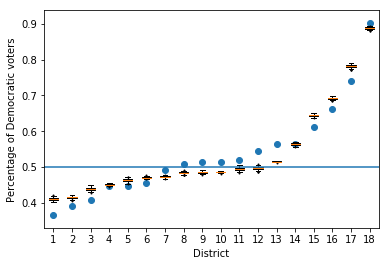

In [33]:
import numpy as np

flierprops = dict(marker='o', markerfacecolor='green', markersize=1,
                  linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(outcome_by_district, flierprops = flierprops)
plt.axhline(0.5)
x = [i+1 for i in list(range(18))]
plt.scatter(x,new_outcome)
plt.title('Distribution of ')
plt.xlabel('District', fontsize=10)
plt.ylabel('Percentage of Democratic voters', fontsize=10)

plt.show()

In [4]:
x = [i+1 for i in list(range(18))]
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
